#**APRENDIZAJE AUTOMATICO Y APRENDIZAJE SUPERVISADO**

**QUE ES ?**

El aprendizaje automático (machine learning) es la disciplina que diseña métodos y modelos que aprenden patrones a partir de datos para hacer predicciones o tomar decisiones sin ser programados con reglas explícitas para cada caso. En lugar de escribir reglas, le damos ejemplos (datos) y el modelo infiere la regla.

**Definiciones históricas y modernas**

* **Samuel (1959):** visión temprana — “programar ordenadores para que aprendan de la experiencia”, la idea de que el ordenador reduzca la programación manual mediante experiencia.

* **Mitchell (1997):** definición formal: “Un programa aprende de la experiencia E respecto a tareas T y medida P si su rendimiento en T, medido por P, mejora con E.” — introduce las tres piezas: T (tarea), E (experiencia/datos) y P (medida/metric).

* **Alpaydin (2010):** “Programar ordenadores para optimizar un criterio de rendimiento utilizando datos de ejemplo o experiencias pasadas.” — énfasis en optimización.

* **Mohri (2012):** resalta que son “métodos computacionales que utilizan la experiencia para mejorar rendimiento o predicción”.

---

**DEFINICION MATEMATICA**

**Idea simple**

Imagina que quieres predecir y (ventas) a partir de x (gasto en publicidad). La regresión lineal asume una relación lineal:

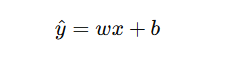

donde 𝑤 (peso) y 𝑏 (bias/ordenada) son parámetros que ajusta el modelo.

* **Objetivo:** Encontrar 𝑤 y 𝑏 que minimicen una función de error sobre los datos, por ejemplo el Error Cuadrático Medio (MSE):

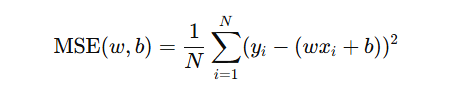

**Solución (intuitiva)** :

* **Para una dimensión (x escalar)**: hay solución analítica (mínimos cuadrados normales).

* **Para muchas dimensiones o modelos más complejos**:  se usa gradiente descendente para minimizar la función de coste.

**¿Para qué sirve?**

1. Predecir valores continuos (precio de casas, temperatura, ventas).

2. Es base para modelos más complejos y fácil de interpretar (coeficientes indican efecto de cada variable).

---

**Explicación de cómo funciona en IA**

* **Entrenamiento:** El algoritmo recibe ejemplos
(
𝑥
𝑖
,
𝑦
𝑖
)
	​

Calcula el error según MSE y ajusta
𝑤
,
𝑏
w,b para minimizarlo (analítica o iterativa).

* **Predicción:** Con los
𝑤
,
𝑏
 aprendidos, dado un nuevo
𝑥 output
𝑦
^

* **Generalización:** Evaluamos en datos nuevos para comprobar que no sobreajusta.

In [ ]:
# Ejemplo: regresión lineal sencilla con scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1) datos sintéticos
X = np.array([[1],[2],[3],[4],[5]])   # características (gasto publicitario)
y = np.array([2,4,5,4,5])             # objetivo (ventas)

# 2) dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 3) crear modelo e entrenar
model = LinearRegression()
model.fit(X_train, y_train)

# 4) predecir y evaluar
y_pred = model.predict(X_test)
print("Coeficiente w:", model.coef_)
print("Intercept b:", model.intercept_)

Coeficiente w: [0.78571429]
Intercept b: 1.5714285714285716


##**Relación entre IA, Ciencia de Datos, Estadística y Minería de Datos**

* **Inteligencia Artificial (IA):** campo amplio donde ML es una sub-área; IA busca crear sistemas que imiten capacidades humanas (planificación, razonamiento, percepción).

* **Machine Learning (aprendizaje automático):** técnicas que permiten a sistemas aprender de datos (subconjunto de IA).

* **Data Science (Ciencia de Datos):** proceso completo de obtención, limpieza, análisis y comunicación de datos; incluye ML como herramienta.

* **Estadística:** teoría y métodos para describir e inferir a partir de datos; aporta fundamentos (tests, estimadores, incertidumbre).

* **Minería de Datos (Data Mining):** extracción de patrones interesantes de grandes bases de datos — mucho overlap con ML y EDA.

> **La estadística aporta teoría, ciencia de datos es la práctica aplicada, minería extrae patrones y ML/IA usa esos patrones para automatizar decisiones/predicciones.**

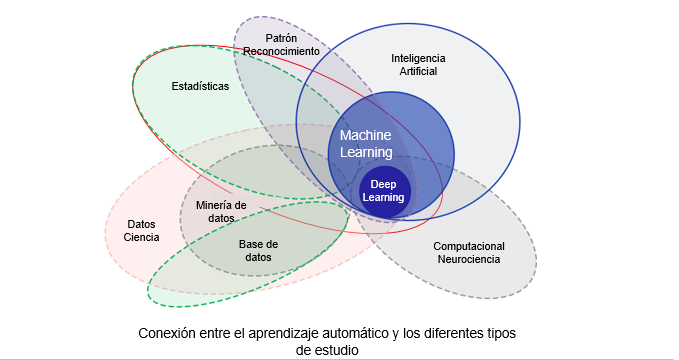

###**PARAMETROS E HIPERPARAMETROS**

| Modelo                | Parámetros                                                  | Hiperparámetros                                                                                        |
| --------------------- | ----------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **Regresión lineal**  | Pendiente (w) y bias (b) aprendidos al ajustar línea.       | No suele tener, salvo regularización (λ en Ridge o Lasso).                                             |
| **Árbol de decisión** | Los puntos de corte aprendidos de los datos.                | Profundidad máxima (`max_depth`), número mínimo de muestras por nodo (`min_samples_split`).            |
| **KNN**               | No tiene “parámetros aprendidos” (es un modelo *perezoso*). | `k` (número de vecinos), tipo de distancia (`metric`), ponderación (`weights`).                        |
| **Red neuronal**      | Pesos y sesgos en cada capa.                                | Tasa de aprendizaje (`learning_rate`), número de capas y neuronas, tamaño del batch, número de épocas. |


---

**Imagina que entrenas un robot a lanzar una pelota a un blanco:**

Los parámetros son las fuerzas, ángulos y tiempos que el robot ajusta mientras practica (aprendizaje).

Los hiperparámetros son las reglas del entrenamiento, como “cuántas veces puede practicar”, “qué tan rápido ajusta sus movimientos” o “cuántos lanzamientos promedia antes de corregir”.

**Cómo se eligen los hiperparámetros**

* Normalmente no hay una fórmula exacta, se prueban varios valores y se evalúa cuál da mejor desempeño:

* Búsqueda exhaustiva (GridSearchCV): prueba todas las combinaciones.

* Búsqueda aleatoria (RandomizedSearchCV): prueba un subconjunto aleatorio.

* Optimización bayesiana / AutoML: el sistema aprende qué combinaciones explorar.



---

##**Tipos de aprendizaje automático**

**SUPERVISADO , NO - SUPERVISADO , POR REFUERZO**

##**Aprendizaje Supervisado**

El aprendizaje supervisado es una técnica de aprendizaje automático en la cual el modelo se entrena utilizando un conjunto de datos etiquetado.
Esto significa que, para cada ejemplo del conjunto de entrenamiento, se conoce la entrada (X) y la salida deseada (y).

Formalmente, el conjunto de entrenamiento está compuesto por pares ordenados:

**donde:**

* **X** representa las características o variables de entrada.
**Por ejemplo:** la edad, el peso, el tamaño de una casa, el número de habitaciones, etc.

* **y** es la etiqueta o valor de salida que se desea predecir.
**Por ejemplo:** el precio de una casa, si un correo es spam o no, o si un paciente está enfermo o sano.

**El objetivo del aprendizaje supervisado es encontrar una función matemática f(X) tal que, para una nueva entrada X'**, la salida f(X') sea lo más cercana posible al valor real y'.
Esa función puede ser lineal o no lineal, dependiendo del algoritmo utilizado.

---

###**Matemáticamente se expresa como:**






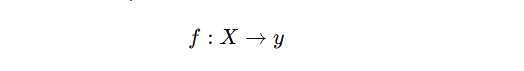

Es decir, el modelo aprende una relación o mapeo entre los datos de entrada y las etiquetas de salida.

---

###**Cómo Funciona Internamente**

El proceso se divide en tres fases principales:

1. **Entrenamiento:**
El modelo analiza los datos etiquetados y ajusta sus parámetros internos (por ejemplo, pesos en una red neuronal) para reducir la diferencia entre las predicciones y las etiquetas verdaderas.

2. **Optimización:**
Para medir esta diferencia se utiliza una función de pérdida o función de costo, que indica qué tan “mal” está prediciendo el modelo.

    * El objetivo del modelo es minimizar esta función.

3. **Evaluación y generalización:**
Una vez entrenado, el modelo se prueba con nuevos datos que no ha visto antes, para comprobar si aprendió a generalizar, es decir, si puede hacer predicciones correctas en casos nuevos.

---

.

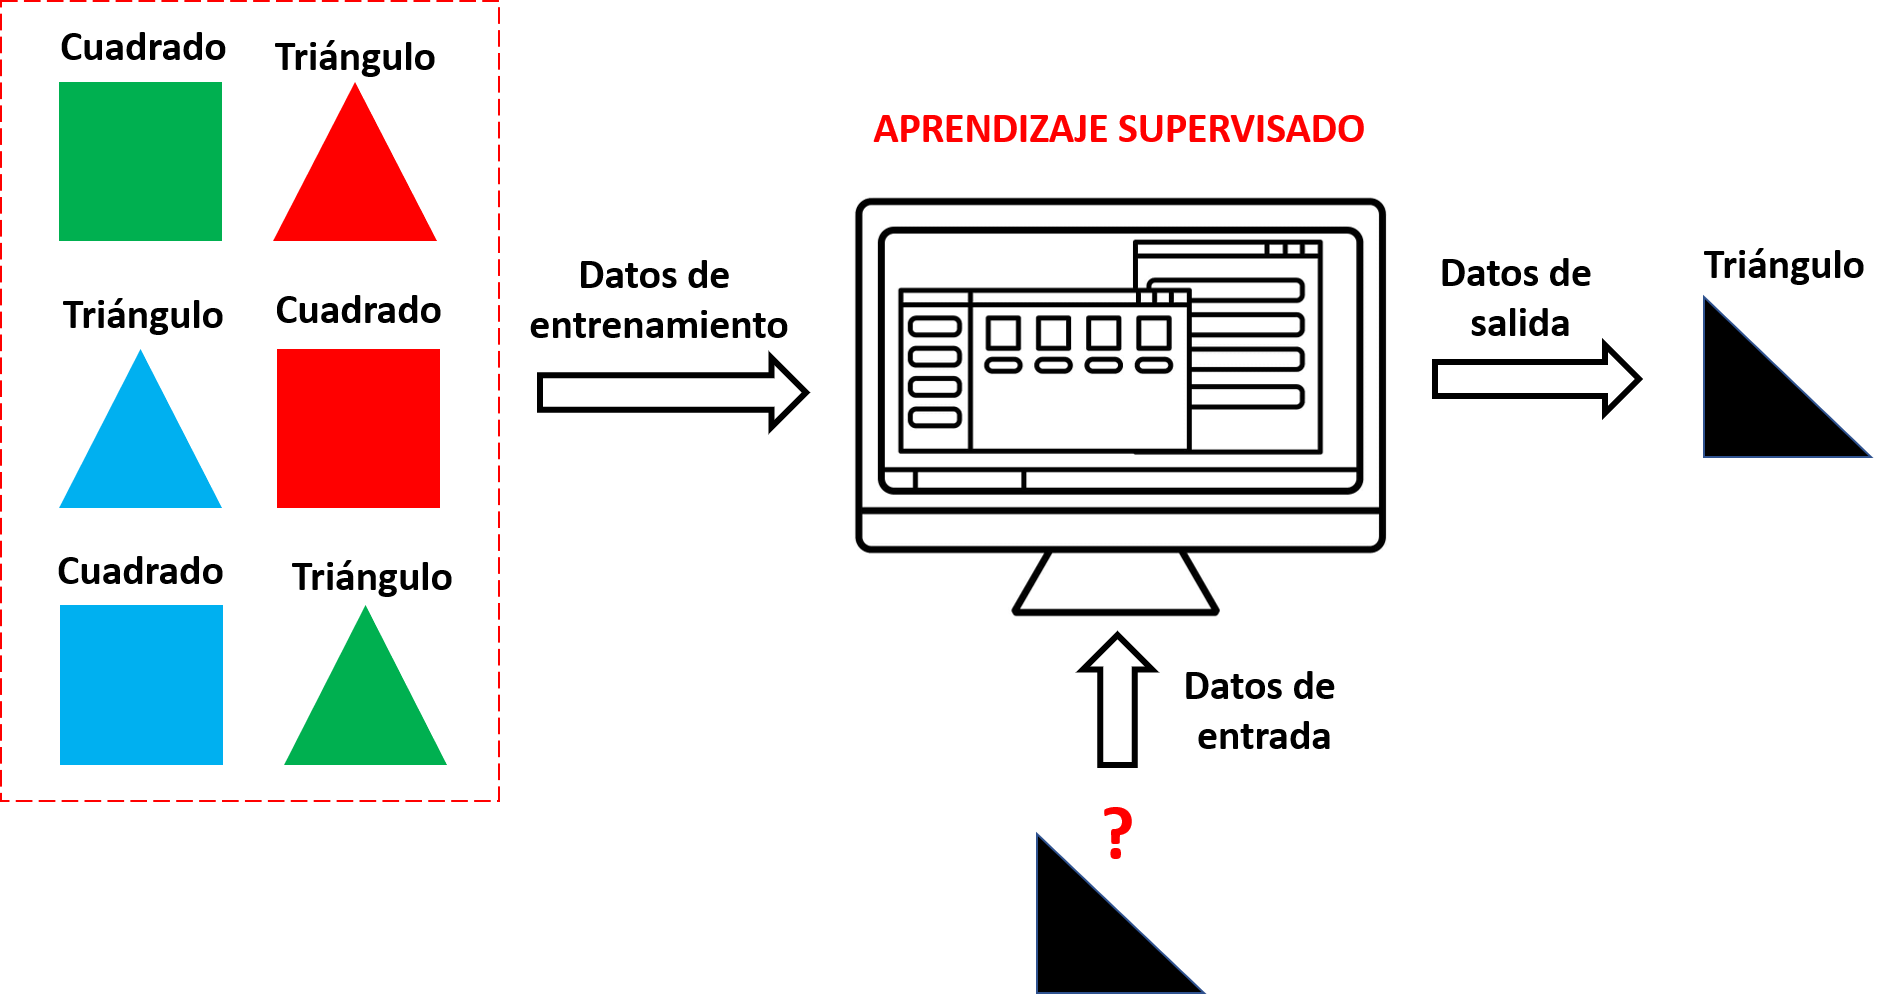

---

###**Funciones de Pérdida Más Comunes**

**Error cuadrático medio (MSE - Mean Squared Error):**
Se usa principalmente en tareas de regresión. Mide el promedio de los cuadrados de las diferencias entre el valor predicho y el valor real. Su fórmula es:



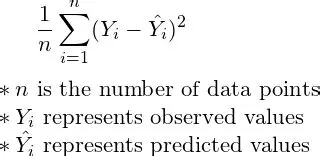

> Cuanto más pequeño sea el MSE, mejor es el ajuste del modelo.
Por ejemplo, en la predicción del precio de una casa, si el modelo predice 200,000 y el valor real es 205,000 , el error cuadrático mide esa desviación.

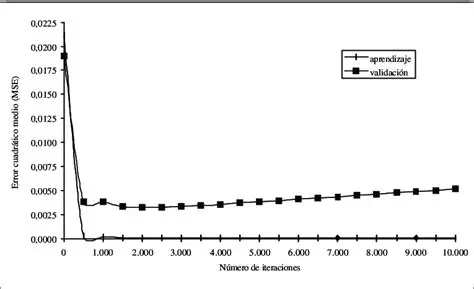

**Entropía cruzada (Cross-Entropy Loss):**
Se utiliza en clasificación, especialmente en problemas binarios o multiclase.

Mide la diferencia entre dos distribuciones de probabilidad: la distribución real (etiquetas verdaderas) y la predicha por el modelo.

Si las predicciones se acercan a las probabilidades reales, la entropía cruzada será baja.
Es muy usada en redes neuronales y modelos de clasificación como el reconocimiento de imágenes o detección de spam.

---


**Tipos de Tareas Supervisadas**

* **Clasificación:**
El modelo asigna una etiqueta discreta a cada entrada.
Ejemplo:

    * Correo spam o no spam.

    * Diagnóstico: enfermedad sí/no.

    * Reconocimiento de imagen: gato, perro o automóvil.

* **Regresión:**
El modelo predice un valor numérico continuo.
Ejemplo:

    * Predicción del precio de una vivienda.

    * Estimación de la temperatura.

    * Pronóstico de ventas futuras.


---

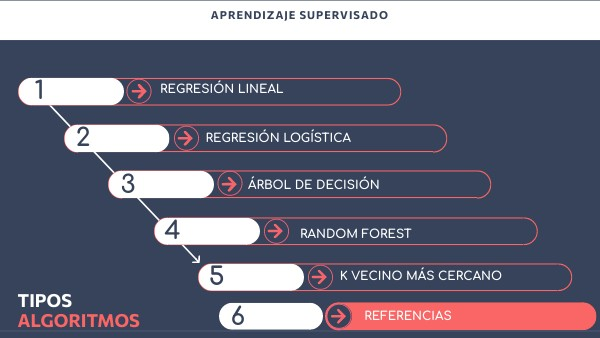

###**Ejemplos de Algoritmos Supervisados**

1. Regresión Lineal y Polinómica

2. Regresión Logística (para clasificación binaria)

3. Árboles de Decisión

4. Random Forests

5. Support Vector Machines (SVM)

6. K-Nearest Neighbors (KNN)

7. Redes Neuronales Artificiales (ANN)

---

###**Cuándo Usarlo**

Se usa cuando:

* Existen datos históricos donde se conoce la respuesta correcta.

* Se desea predecir resultados o clasificar nuevas observaciones.

###**Ejemplos de uso:**

* **En finanzas:** predicción del valor de acciones o riesgo crediticio.

* **En medicina:** diagnóstico de enfermedades a partir de síntomas.

* **En marketing:** predicción de abandono de clientes.

* **En procesamiento de lenguaje natural:** clasificación de correos o análisis de sentimientos.

##**Aprendizaje No Supervisado**

El aprendizaje no supervisado se aplica cuando el conjunto de datos no tiene etiquetas, es decir, solo se dispone de las variables de entrada X y no se conoce ninguna salida y.
El objetivo del modelo es descubrir patrones, estructuras o relaciones ocultas en los datos sin tener una guía previa sobre qué es correcto o incorrecto.

En este caso, el modelo no aprende una función f(X) → y, sino que busca organizar los datos según sus características.

###**Cómo Funciona Internamente?**

El modelo analiza los datos para medir similitudes o distancias entre ellos (por ejemplo, usando la distancia euclidiana o coseno).

Luego, intenta agrupar los datos similares o reducir la dimensionalidad para representar los datos de manera más simple y comprensible.



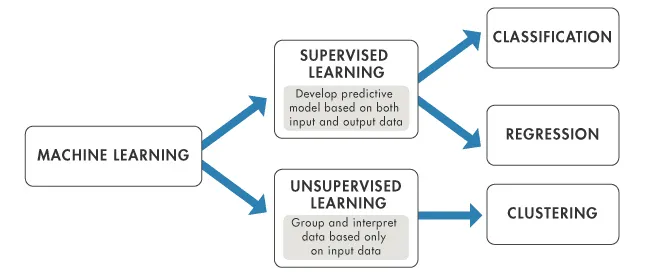

###**Principales Tareas del Aprendizaje No Supervisado**

###**Clustering (agrupamiento):**
Consiste en dividir los datos en grupos (clusters) de manera que los elementos dentro de un grupo sean muy similares entre sí y diferentes de los de otros grupos.

**Ejemplo:** segmentar clientes en grupos según su comportamiento de compra.

**Algoritmos típicos:**

* K-means

* DBSCAN

* Modelos de mezcla gaussiana (GMM)

###**Reducción de dimensionalidad:**
Busca simplificar los datos reduciendo el número de variables, pero manteniendo la información más importante.

**Ejemplo:** reducir miles de variables de píxeles en una imagen a unas pocas componentes principales para visualizar datos complejos.

**Algoritmos típicos:**

* PCA (Análisis de Componentes Principales)

* t-SNE

* UMAP

**Detección de anomalías:**
* Identifica patrones o puntos de datos que son muy diferentes al resto. Ejemplo: detección de fraudes en tarjetas de crédito.



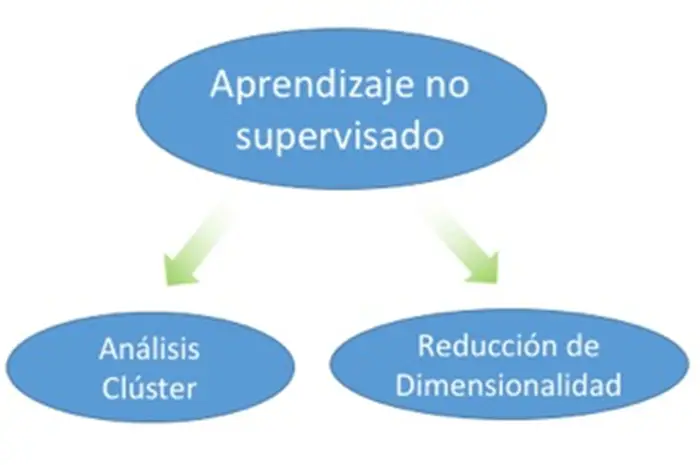

###**Cuándo Usarlo?**

**Se utiliza cuando:**

1. No existen etiquetas conocidas.

2. Se quiere explorar o entender la estructura de los datos.

3. Se desea realizar segmentaciones, agrupaciones o visualizaciones.


###**Ejemplos de Aplicaciones**


* Segmentación de clientes en marketing.

* Análisis exploratorio de datos en ciencia de datos.

* Detección de fraudes financieros.

* Compresión o visualización de datos de alta dimensión.

* Recomendadores basados en similitud de comportamiento (filtrado colaborativo).

---

##**APRENDIZAJE POR REFUERZO**

El aprendizaje por refuerzo es una rama del aprendizaje automático inspirada en la forma en que los seres humanos y los animales aprenden por experiencia.
En lugar de aprender a partir de ejemplos etiquetados como en el aprendizaje supervisado, aquí el sistema aprende mediante interacción directa con un entorno, recibiendo retroalimentación en forma de recompensas o castigos.

El objetivo principal del aprendizaje por refuerzo es que un agente aprenda a tomar decisiones óptimas a lo largo del tiempo, de modo que maximice la recompensa total acumulada.

En otras palabras, el agente experimenta, comete errores, recibe recompensas o penalizaciones, y con el tiempo aprende una estrategia (política) que le permite actuar de la mejor manera posible en cada situación.

**Componentes Fundamentales**

El aprendizaje por refuerzo puede entenderse como una interacción continua entre dos entidades principales:

1. El Agente

2. El Entorno (Environment)

Estas dos entidades interactúan a través de un ciclo de observación, acción y retroalimentación.

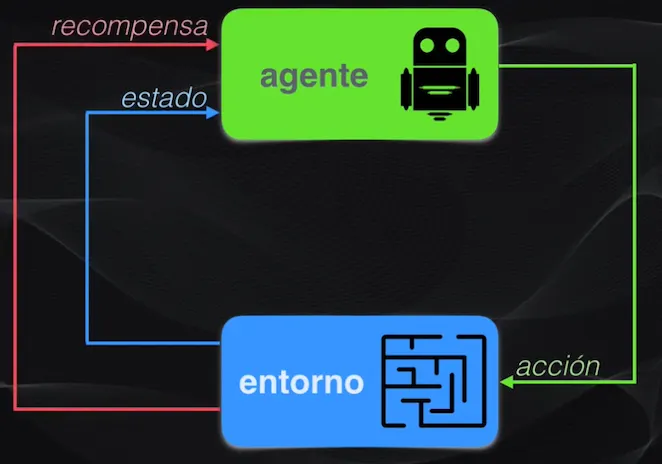

---

**El Agente**

El agente es el sujeto que aprende, es decir, el componente del sistema que toma decisiones.
Su tarea es elegir acciones basándose en la información que recibe del entorno, con el fin de maximizar las recompensas futuras.

* El agente puede ser un programa de computadora, un robot, o incluso una política matemática.

* En cada paso del tiempo (t), el agente observa el estado actual del entorno y decide una acción que cree que lo acercará a su objetivo.

**Ejemplo:**

* En un videojuego, el agente es el jugador controlado por la inteligencia artificial.

* En un robot que camina, el agente es el sistema de control que decide cómo mover las articulaciones.

* En un sistema de trading, el agente es el algoritmo que decide comprar o vender acciones.

**El Entorno**

El entorno (environment) es el mundo con el que interactúa el agente.

El entorno responde a las acciones del agente cambiando su estado y proporcionando una recompensa numérica que indica qué tan buena fue la acción tomada.

**Ejemplo:**

* En un videojuego, el entorno es el tablero, los enemigos y las reglas del juego.

* En un robot, el entorno es el espacio físico en el que se mueve.

* En un sistema financiero, el entorno son los mercados y sus fluctuaciones.


---

**Ciclo de Aprendizaje**

El proceso de aprendizaje por refuerzo ocurre en pasos de tiempo discretos, y en cada paso sucede lo siguiente:

* **El agente observa el estado actual del entorno**

* **Con base en su experiencia o política actual, el agente elige una acción**

* **El entorno responde a esa acción y devuelve:**

    * Una nueva observación o estado siguiente
      ​
    * Una recompensa numérica

* **El agente actualiza su conocimiento o su estrategia según la recompensa recibida.**

* **Este ciclo se repite muchas veces, lo que permite al agente mejorar gradualmente su comportamiento.***


**El proceso puede representarse matemáticamente como una secuencia:**






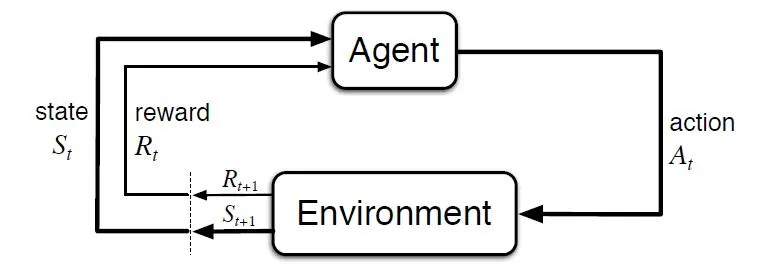

**Principales Técnicas de Aprendizaje por Refuerzo**

**Q-Learning:**
El agente aprende una tabla llamada Q-table donde cada par (estado, acción) tiene un valor Q(s,a) que representa la recompensa esperada.
A medida que interactúa con el entorno, el agente actualiza los valores Q hasta converger a la política óptima.

**SARSA:**
Similar a Q-Learning, pero actualiza sus valores basándose en la acción realmente ejecutada, no en la óptima esperada.
Es una técnica más conservadora y cercana al comportamiento real del agente.

**Métodos Actor-Critic:**
**Combinan dos componentes:**

* **Actor:** elige acciones basadas en la política actual.

* **Critic:** evalúa qué tan buena fue la acción tomada (usa una función de valor).

* **Deep Q-Networks (DQN):**
Sustituye la tabla Q por una red neuronal profunda que aproxima la función Q(s,a).
Esto permite trabajar con entornos complejos (como videojuegos o imágenes).

* **PPO (Proximal Policy Optimization) y A3C:**
Métodos modernos basados en aprendizaje profundo, usados ampliamente en control robótico y juegos.
Combinan estabilidad, eficiencia y capacidad de aprender políticas complejas.


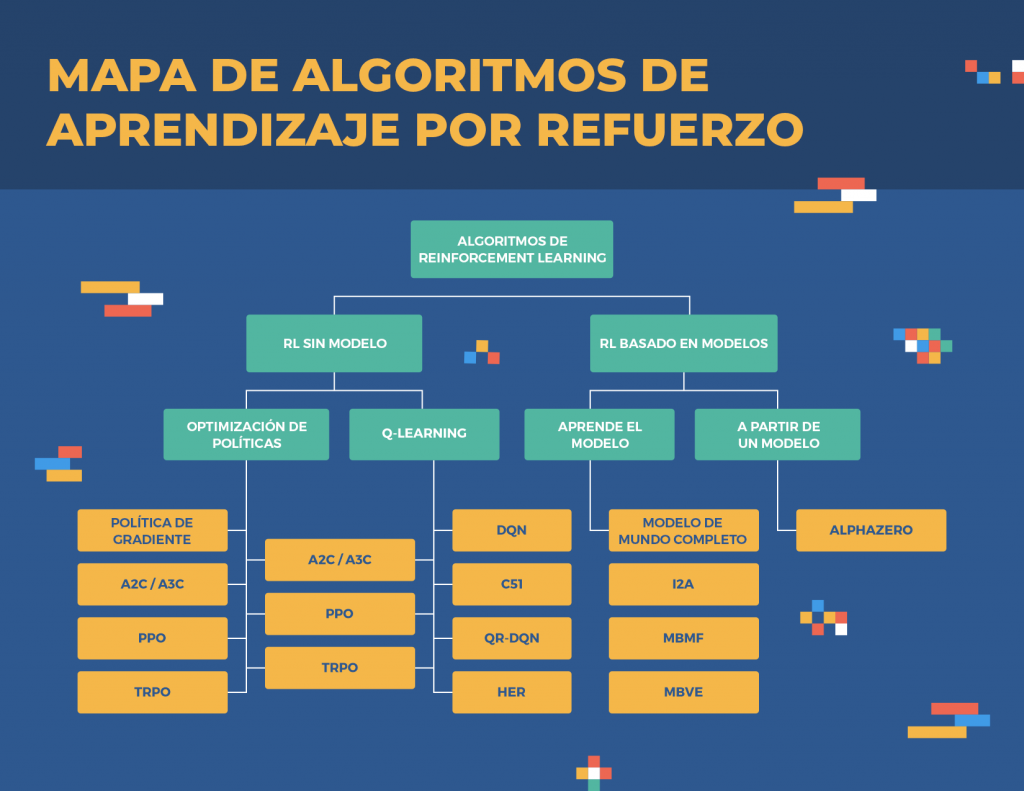

**Cuándo Utilizar el Aprendizaje por Refuerzo**

1. No existen etiquetas ni ejemplos correctos o incorrectos.

2. Las acciones que se toman afectan los estados futuros del entorno.

3. El objetivo se alcanza después de una secuencia de decisiones, no con una sola acción.

4. Existe una retroalimentación en forma de recompensas o penalizaciones.

.


**Ejemplos de Aplicaciones**

* **Robótica:** control de movimiento, navegación autónoma, manipulación de objetos.

* **Videojuegos:** agentes que aprenden a jugar Atari, ajedrez, Go o StarCraft sin intervención humana.

* **Sistemas de recomendación:** que adaptan su comportamiento según la reacción del usuario.

* **Control de tráfico:** optimización de semáforos o rutas de transporte público.

* **Finanzas:** estrategias de inversión y trading algorítmico que aprenden a maximizar retorno con riesgo controlado.

* **Procesos industriales:** control de temperatura, flujo, presión o energía para optimizar eficiencia.

#**Biblioteca Python scikit-learn para el aprendizaje automático**

**scikit-learn (también conocida como sklearn)** es una de las bibliotecas más populares y completas de Python para el desarrollo de modelos de aprendizaje automático (Machine Learning).

**Fue creada sobre bibliotecas fundamentales como NumPy, SciPy y matplotlib**, lo que le permite integrar fácilmente el procesamiento numérico, científico y visual.

Su diseño **se centra en ofrecer una API simple, coherente y de alto nivel**, lo que facilita tanto el uso para principiantes como la extensibilidad para investigadores o ingenieros de datos.

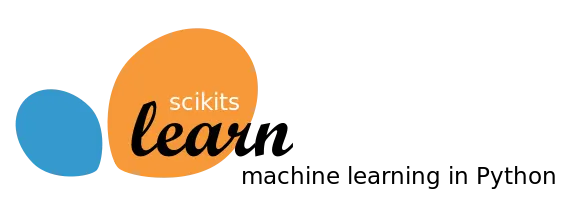

**Características y ventajas de scikit-learn**

1. **Sencillez y coherencia:** todos los algoritmos (llamados estimadores) siguen la misma estructura: fit() para entrenar y predict() para predecir.

2. **Amplia colección de algoritmos:** incluye modelos para clasificación, regresión, clustering, reducción de dimensionalidad, preprocesamiento y validación.

3. **Eficiencia:** implementada sobre NumPy y Cython, lo que permite cálculos rápidos con matrices.

4. **Modularidad:** las funciones pueden combinarse fácilmente (por ejemplo, escalar datos, luego entrenar un modelo y finalmente evaluar resultados).

5. **Documentación extensa y ejemplos reproducibles.**

**Mecanismo general y API de alto nivel**

scikit-learn utiliza un paradigma unificado basado en el concepto de estimadores.

**Un estimador es** cualquier objeto que puede ser entrenado (fit) sobre datos y, posteriormente, aplicado para producir una salida, ya sea una predicción o una transformación.

**Ejemplo general del flujo de trabajo:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris #cambienlo

# Cargar datos
data = load_iris()
X = data.data
y = data.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
modelo = LinearRegression()

# Entrenar (fit)
modelo.fit(X_train, y_train)

# Predecir (predict)
predicciones = modelo.predict(X_test)

print("Prediccion: ", predicciones[:5])
print("Real: ", y_test[:5])

Prediccion:  [ 1.23071715 -0.04010441  2.21970287  1.34966889  1.28429336]
Real:  [1 0 2 1 1]


---

###**Conceptos clave**

**Estimador**:
Es la clase base de la mayoría de los objetos en scikit-learn.
Un estimador implementa al menos el método fit(X, y) o fit(X) dependiendo del tipo de aprendizaje. Ejemplos:

* LinearRegression() → aprende los coeficientes de una recta.

* KMeans() → aprende los centroides de los grupos.

* StandardScaler() → aprende los parámetros para normalizar datos.

**Clasificador** :
Un clasificador es un tipo de estimador que asigna una categoría o etiqueta discreta a cada instancia.Ejemplo:

* LogisticRegression()

* RandomForestClassifier()

* SVC()

**Regresor**: Un regresor predice un valor continuo, como el precio o la temperatura. Ejemplo:

* LinearRegression()

* SVR()

* DecisionTreeRegressor()

---

###**Uso básico de métodos fundamentales**

* **fit(X, y)**: Entrena el modelo con los datos de entrada X y las etiquetas y.

* **predict(X)**: Realiza predicciones sobre nuevos datos.

* **transform(X)**: Transforma los datos de acuerdo a lo aprendido (por ejemplo, escalar, reducir dimensionalidad).

* **fit_transform(X)**: Combina los pasos anteriores: entrena y transforma en un solo paso.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #hace escalada estandar
from sklearn.preprocessing import MinMaxScaler #tranforma a cero-uno

data = {
    'Estudiantes':['Maria', 'Luis', 'Erick', 'Diego'],
    'Edad':[20,22,26,28],
    'Promedio':[85,99,72,95]
}

df = pd.DataFrame(data)

scaler = MinMaxScaler()
df[['Edad', 'Promedio']] = scaler.fit_transform(df[['Edad', 'Promedio']] )
df

###**Carga de datos (datasets)**

scikit-learn provee datasets integrados para práctica y experimentación.

**Ejemplo:**

      from sklearn.datasets import load_breast_cancer

      data = load_breast_cancer()
      X = data.data
      y = data.target

**División del conjunto de datos (train_test_split)**

Para evaluar un modelo, se divide el conjunto total de datos en dos partes: entrenamiento y prueba.

      from sklearn.model_selection import train_test_split

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


* **test_size=0.3** significa que el 30 % de los datos se usa para prueba.

* **random_state** garantiza la reproducibilidad.



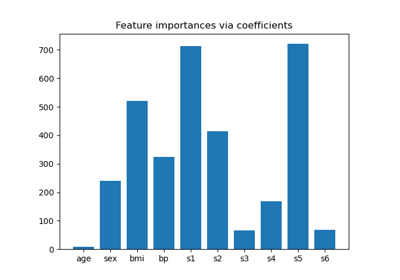

---

**Métricas (metrics.accuracy_score)**

Las métricas permiten medir el rendimiento del modelo.
En clasificación, la métrica más usada es accuracy (exactitud):

      from sklearn.metrics import accuracy_score

      accuracy = accuracy_score(y_test, modelo.predict(X_test))


**También existen otras métricas:**

* precision_score()

* recall_score()

* f1_score()

* mean_squared_error() (para regresión)

* Validación cruzada (GridSearchCV)

Permite evaluar diferentes combinaciones de hiperparámetros mediante validación cruzada para encontrar los valores óptimos.

**Ejemplo:**

      from sklearn.model_selection import GridSearchCV
      from sklearn.svm import SVC

      param_grid = {'C':[0.1,1,10], 'kernel':['linear','rbf']}
      grid = GridSearchCV(SVC(), param_grid, cv=5)
      grid.fit(X_train, y_train)
      print(grid.best_params_)

---

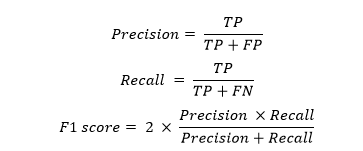

**Normalización y estandarización (StandardScaler)**

Normalizar o estandarizar las características es fundamental para muchos modelos.

* **Normalización:** escala los valores al rango [0,1].

* **Estandarización:** centra los datos en media 0 y varianza 1.

      from sklearn.preprocessing import StandardScaler

      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)

---

**Principales módulos de scikit-learn**

* sklearn.datasets – carga de conjuntos de datos.

* sklearn.model_selection – división y validación.

* sklearn.preprocessing – escalado y codificación.

* sklearn.linear_model – regresión lineal, logística.

* sklearn.tree – árboles de decisión.

* sklearn.ensemble – Random Forest, Gradient Boosting.

* sklearn.cluster – K-means, DBSCAN.

* sklearn.metrics – evaluación de rendimiento.


###**Preparación y división del conjunto de datos**

Antes de entrenar cualquier modelo, es necesario preparar los datos para garantizar un aprendizaje correcto y evitar errores como el sobreajuste o el infraajuste.

1. **Sobreajuste (Overfitting)**

Sucede cuando el modelo aprende demasiado los datos de entrenamiento, incluyendo ruido y detalles irrelevantes, por lo que falla al generalizar en nuevos datos.
Ejemplo: un modelo que memoriza los datos en lugar de aprender la tendencia general.

2. **Infraajuste (Underfitting)**

Ocurre cuando el modelo no aprende lo suficiente, es decir, no capta la relación entre las variables, ni siquiera en el entrenamiento.
Ejemplo: usar un modelo lineal para datos que claramente siguen una relación no lineal.

**Comparación de errores**

* Error de entrenamiento bajo y error de prueba alto → sobreajuste.

* Error de entrenamiento alto y error de prueba alto → infraajuste.

* Errores similares y bajos → buen modelo generalizado.

---

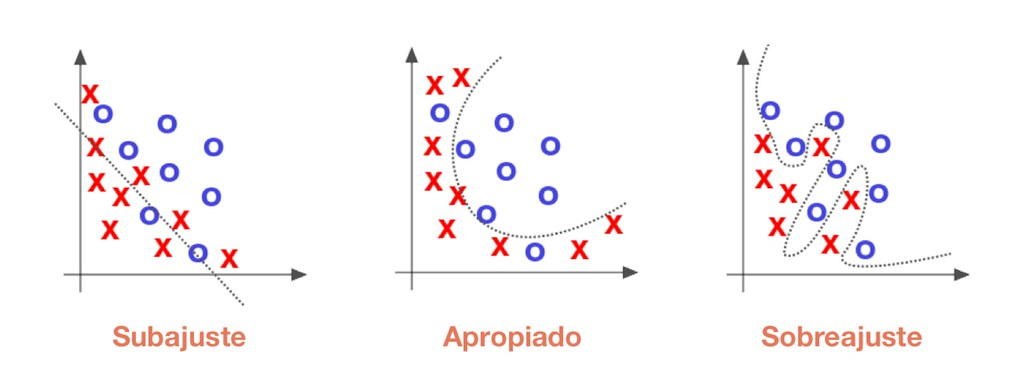

**Métodos de división de datos**

* **Entrenamiento / prueba:** división simple (por ejemplo, 80 % entrenamiento, 20 % prueba).

* **Validación cruzada:** evalúa el modelo en varios subconjuntos.

* **k-Fold:** divide los datos en k partes, entrena en k − 1 y valida en la restante.

* **Leave-One-Out (LOO):** cada muestra individual sirve como conjunto de prueba una vez.

* **k-cross:** término general que abarca k-folds y variantes.

---

###**Preprocesamiento de datos para hacer un buen conjunto de entrenamiento**

El preprocesamiento de datos es esencial para preparar los datos antes del entrenamiento, mejorar la calidad del modelo y garantizar que las características sean comparables.

---

**Procesamiento de valores perdidos**

Los datos pueden tener valores faltantes (NaN).
Existen varias estrategias para manejarlos:

* Ignorar registros: eliminar filas incompletas.

      df.dropna(inplace=True)


* Sustitución por media, mediana o valor más frecuente:

      from sklearn.impute import SimpleImputer
      imputer = SimpleImputer(strategy='mean')
      X = imputer.fit_transform(X)


**Entrada manual:** asignar valores específicos.

**Identificación con isnull():** detectar valores faltantes.

      df.isnull().sum()


---

**Tratamiento de datos categóricos**

Las variables categóricas representan clases o categorías.

**Escalas categóricas vs continuas:**

* Categóricas: nombres, géneros, tipos de producto.

* Continuas: edad, ingresos, peso.

**Escalas nominales y ordinales:**

* Nominal: sin orden (ej. “rojo”, “verde”, “azul”).

* Ordinal: con orden (ej. “bajo”, “medio”, “alto”).



---



**Codificación de etiquetas (LabelEncoder)**

Convierte categorías en números.

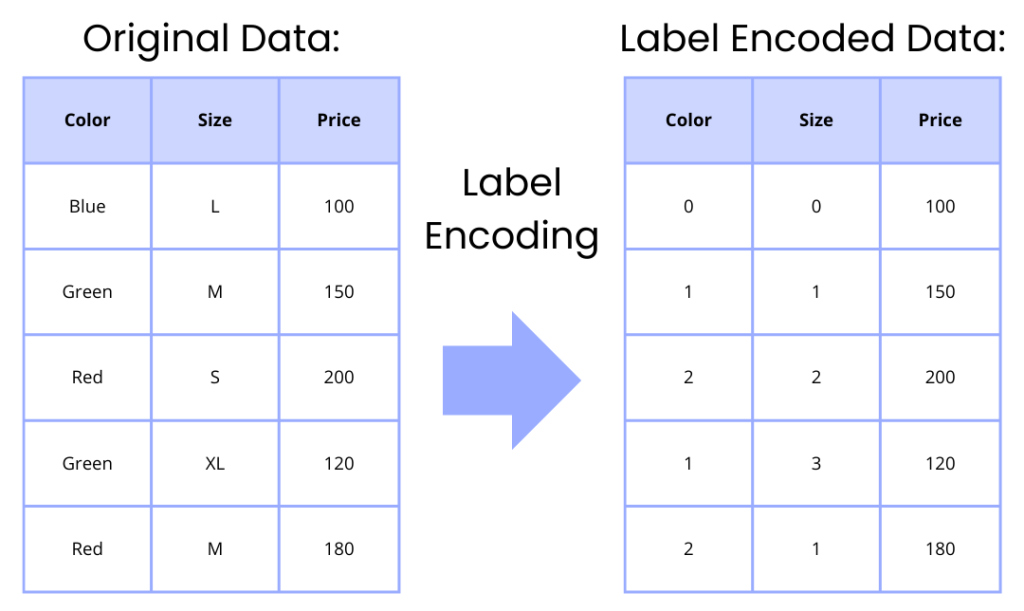

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y) #enviamos columnas reales de un df

**Codificación One-Hot (OneHotEncoder / get_dummies)** Crea columnas binarias para cada categoría.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.get_dummies(df, columns=['columna_categorica'])

KeyError: "None of [Index(['columna_categorica'], dtype='object')] are in the [columns]"

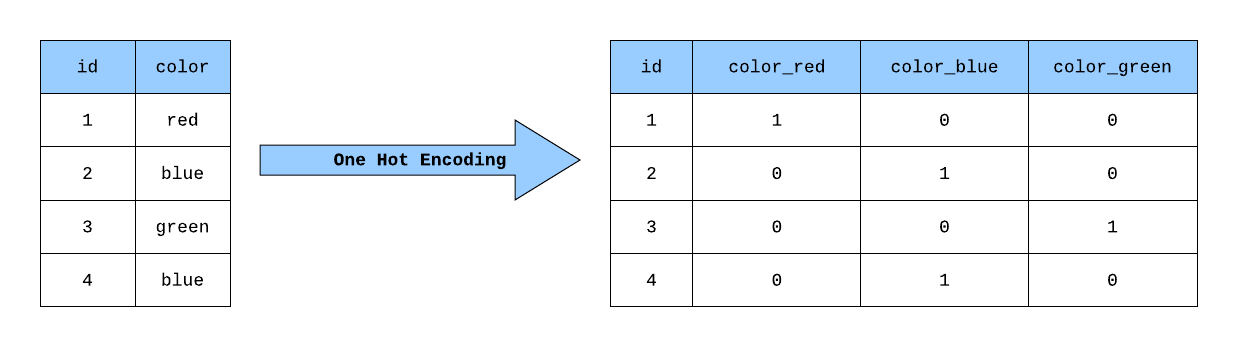

**Matrices dispersas vs densas**

* **Densas:** ocupan más memoria, guardan todos los valores.

* **Dispersas:** solo almacenan valores distintos de cero, ahorrando memoria en grandes conjuntos.

---

**División del conjunto de datos**

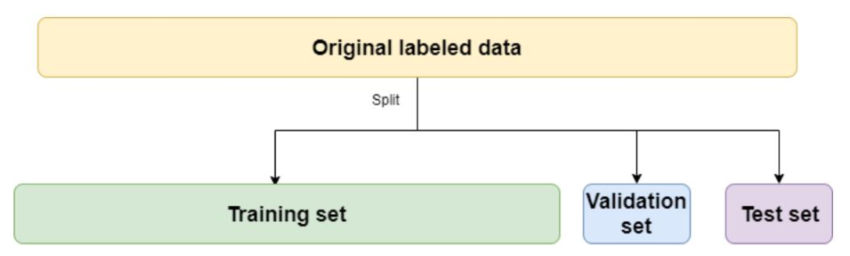

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

**Estratificación:** garantiza que la proporción de clases sea la misma en entrenamiento y prueba.

**Proporciones típicas:**

60 : 40

70 : 30

80 : 20

**Ordenación y escalado entre características**

Diferentes características pueden tener diferentes unidades o escalas, lo que afecta a muchos algoritmos. Por eso se aplica normalización o estandarización.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

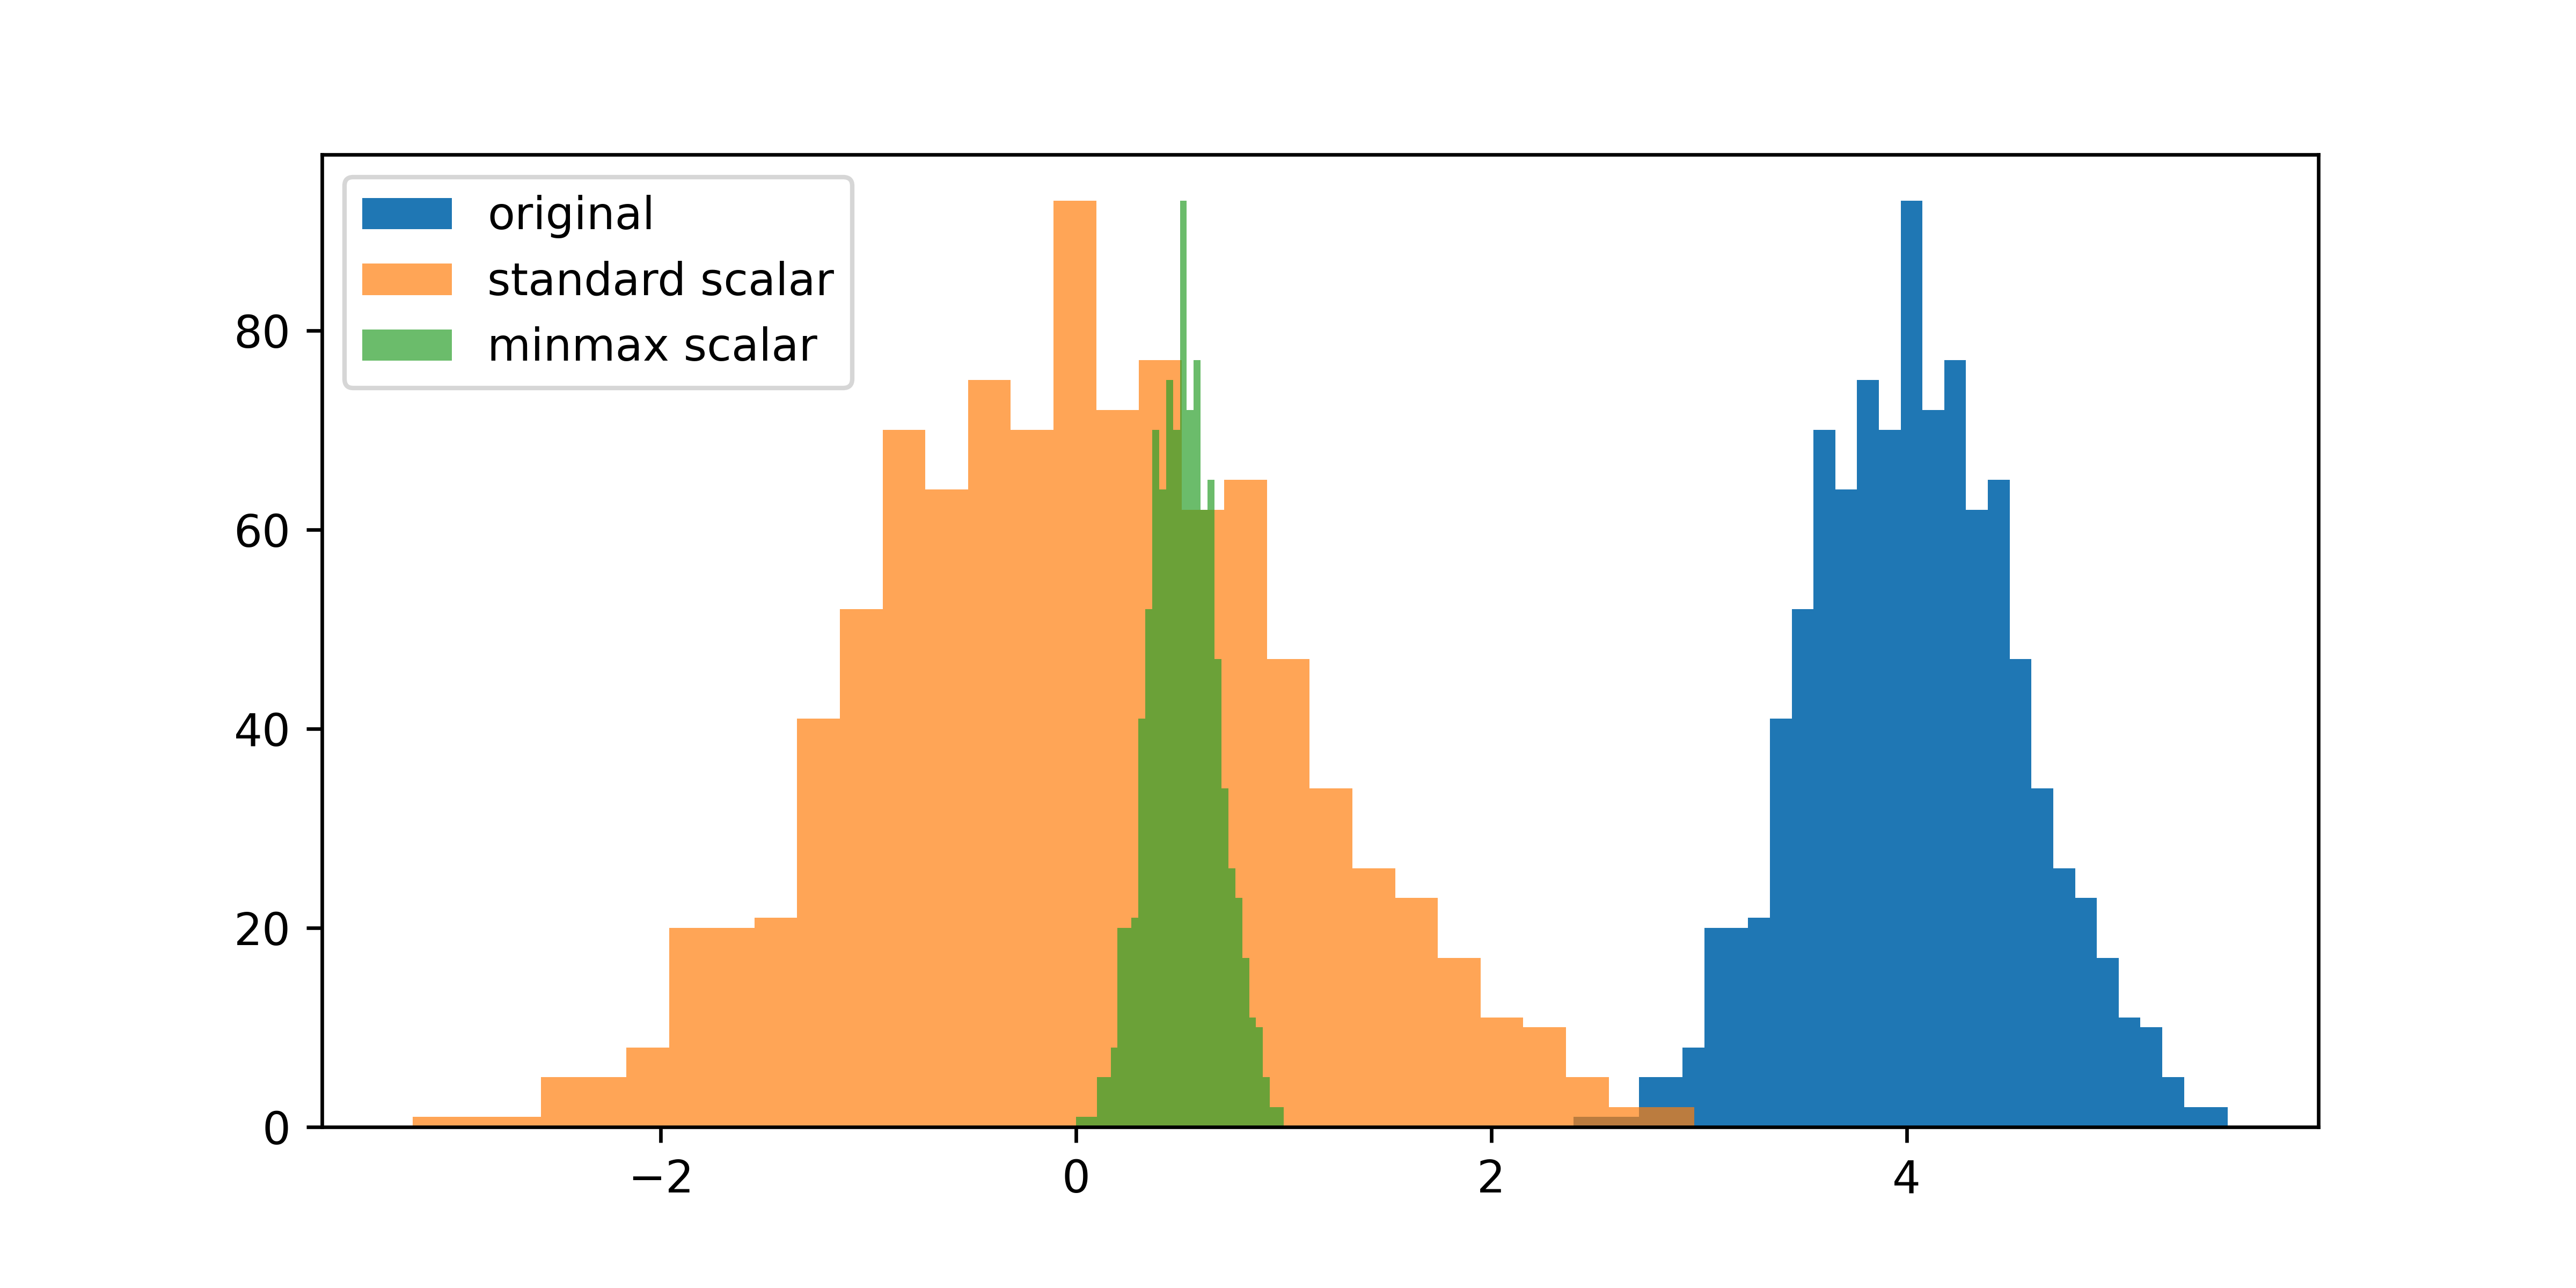

**Regularización, sesgo y varianza**

1. **Sesgo:** error debido a suposiciones simplificadas.

2. **Varianza:** sensibilidad a pequeñas variaciones en los datos.

3. **Compensación sesgo-varianza:** equilibrio entre ambos.

* **Regresión Ridge (L2):** :Penaliza la suma de los cuadrados de los coeficientes. Mantiene todos los parámetros pequeños, evita el sobreajuste.

* **Regresión Lasso (L1):**: Penaliza la suma de los valores absolutos. Tiende a reducir algunos coeficientes a cero → selección automática de características.

**Elastic Net:**

Combina ambas penalizaciones (L1 + L2).

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

---

#**Practicando para encontrar un método óptimo con scikit-learn**

En esta sección pondremos en práctica todo el flujo de trabajo del aprendizaje automático supervisado, utilizando la biblioteca scikit-learn y el clásico dataset del Iris 🌸.

> **Un modelo óptimo es aquel que logra buen rendimiento en datos nuevos, no solo en los de entrenamiento.**

Para ello debemos seguir un proceso estructurado:

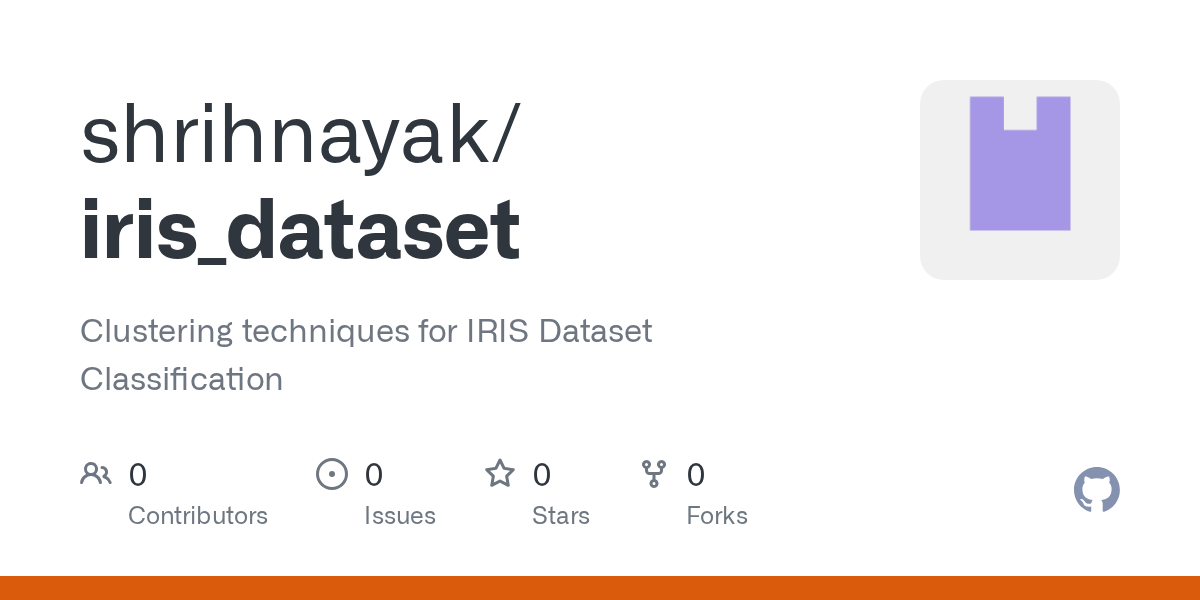

**Pasos para resolver un problema con IA**

1. Definir el problema y objetivo.

2. Explorar y analizar los datos.

3. Preprocesar y dividir el dataset.

4. Seleccionar y entrenar modelos.

5. Evaluar y comparar resultados.

6. Optimizar hiperparámetros.

7. Guardar y reutilizar el modelo.

**Caso de estudio: datos del iris**

> **El dataset Iris contiene 150 muestras de flores de 3 especies:**

* setosa

* versicolor

* virginica

**Cada muestra tiene 4 características:**

* Largo del sépalo

* Ancho del sépalo

* Largo del pétalo

* Ancho del pétalo

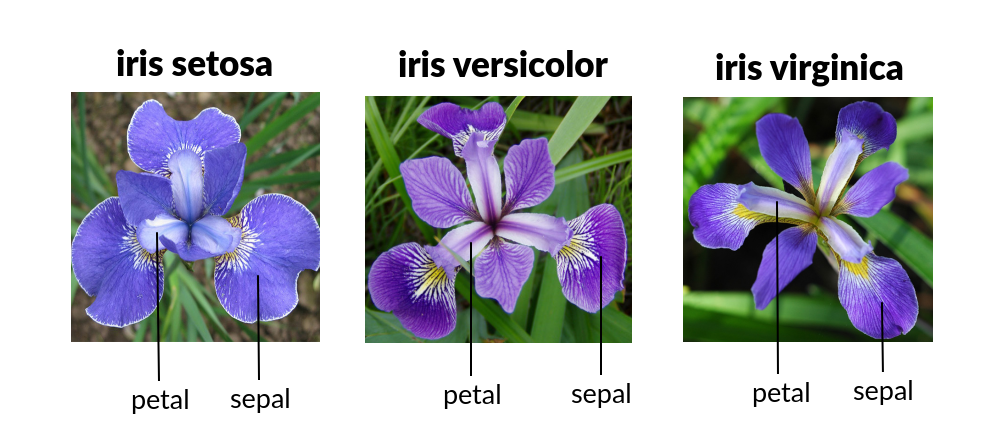

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target
df["species"] = df["species"].replace({0: "setosa", 1: "versicolor", 2: "virginica"})

df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

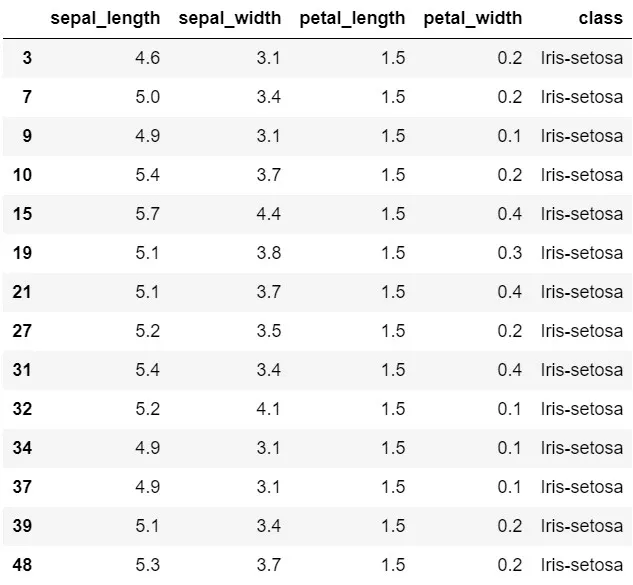

**Análisis exploratorio (EDA)**

Exploramos la estructura general del dataset.

In [ ]:
df.info()
df.describe()
df["species"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

**Análisis estadístico básico**

In [ ]:
# Media, mediana y desviación estándar
print("Medias:\n", df.mean(numeric_only=True))
print("\nDesviaciones estándar:\n", df.std(numeric_only=True))

Medias:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Desviaciones estándar:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


**Correlación (corr) y agregación**

La correlación indica qué tan relacionadas están las variables numéricas.

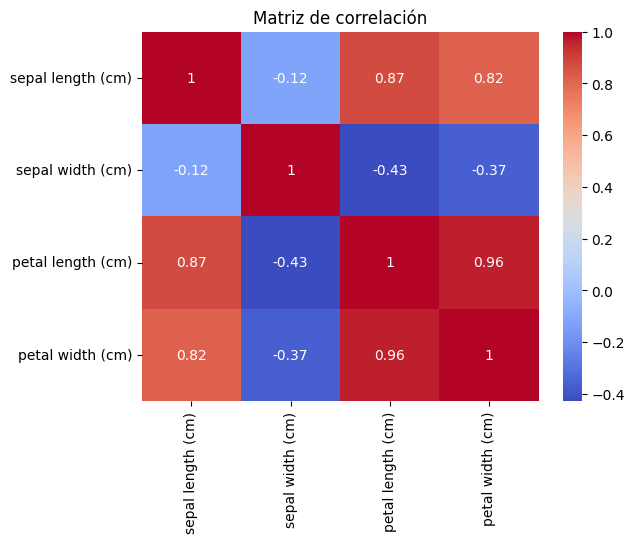

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

**Visualización (boxplot y pairplot)**

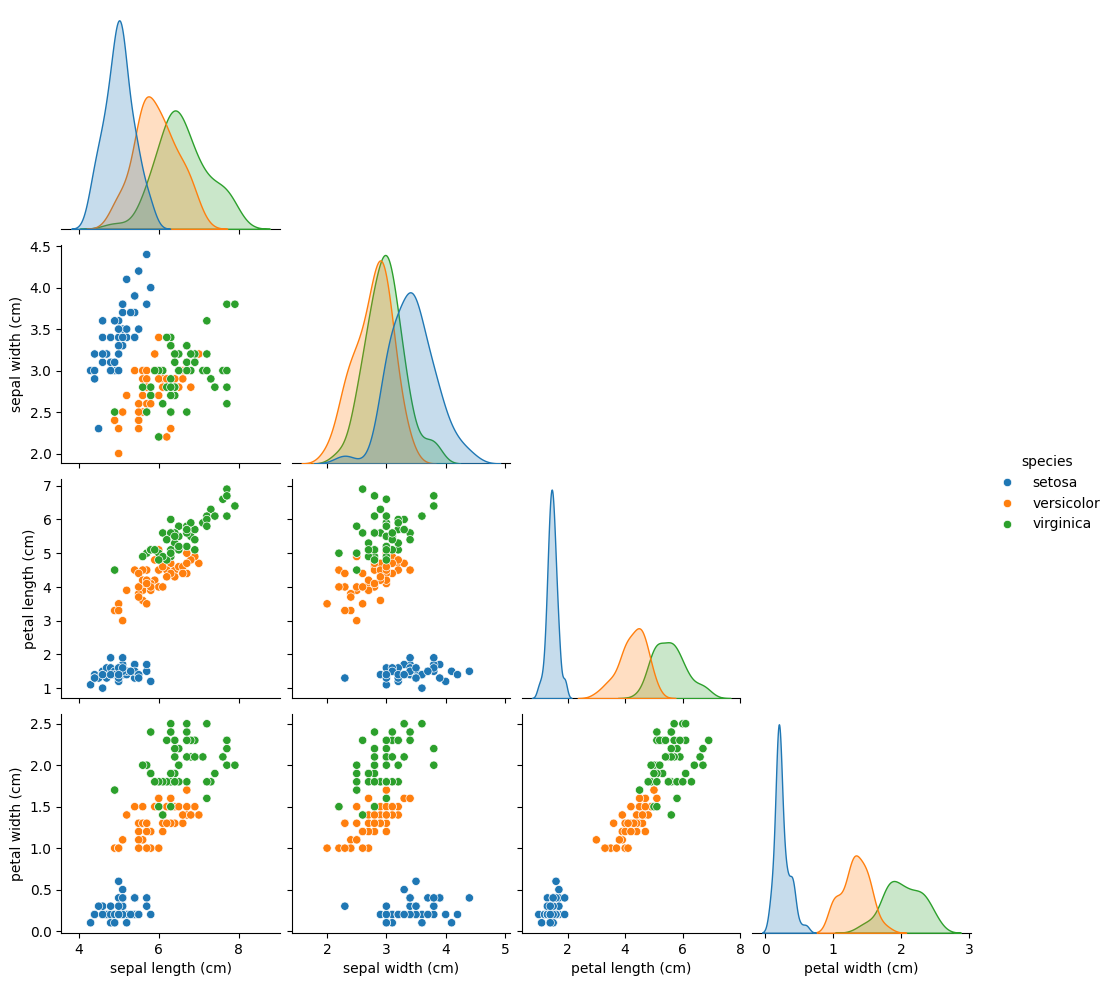

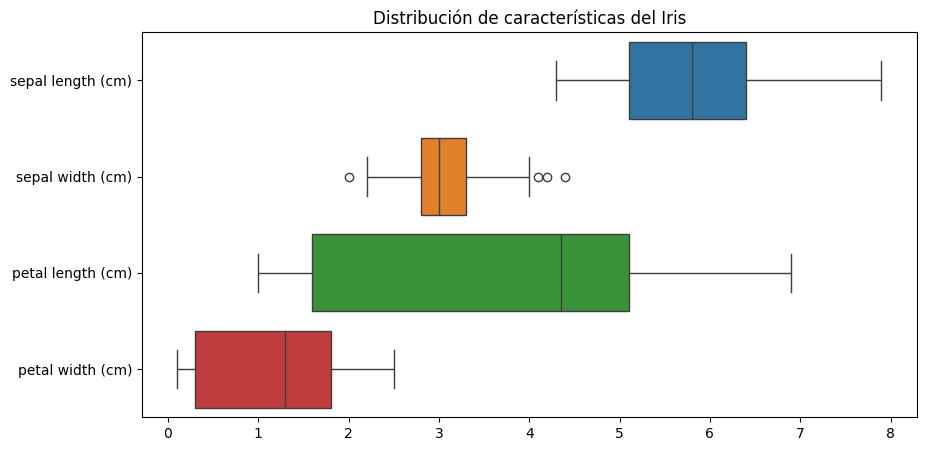

In [ ]:
# Distribución general
sns.pairplot(df, hue="species", corner=True)
plt.show()

# Boxplot para comparar variables
plt.figure(figsize=(10,5))
sns.boxplot(data=df, orient="h")
plt.title("Distribución de características del Iris")
plt.show()

**División del conjunto de datos**

* Dividimos el dataset en entrenamiento (train) y prueba (test) usando el método hold-out.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

Tamaño entrenamiento: (105, 4)
Tamaño prueba: (45, 4)


**Selección de algoritmos**

Probemos con un Árbol de Decisión (DecisionTreeClassifier).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(
    criterion="gini",      # también se puede usar 'entropy'
    max_depth=3,
    min_samples_split=2,
    random_state=42
)

modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Impureza de Gini vs Entropía**

* **Gini:** mide la probabilidad de clasificar incorrectamente una muestra elegida al azar.

* **Entropía:** mide la impureza basándose en la teoría de la información.

Ambas buscan árboles más puros y eficientes.

**Entrenamiento y evaluación del modelo**

In [ ]:
# Evaluación básica
train_score = modelo.score(X_train, y_train)
test_score = modelo.score(X_test, y_test)

print("Precisión en entrenamiento:", train_score)
print("Precisión en prueba:", test_score)

Precisión en entrenamiento: 0.9809523809523809
Precisión en prueba: 0.9777777777777777


**Estrategias de generalización**

Conjunto de validación y validación cruzada

**La validación cruzada** evalúa el rendimiento del modelo en múltiples subconjuntos.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(modelo, X, y, cv=kfold)

print("Puntajes por fold:", scores)
print("Promedio:", scores.mean())

**Curvas de aprendizaje (con Yellowbrick)**

Instalamos primero yellowbrick si no lo tenemos:

In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(modelo, cv=5, scoring='accuracy')
visualizer.fit(X, y)
visualizer.show()

Esta curva ayuda a detectar sobreajuste o infraajuste.

**Optimización del modelo**

* Ajuste de hiperparámetros (GridSearchCV)

* Probamos distintas configuraciones para encontrar el mejor modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 3, 4]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5
)

grid.fit(X_train, y_train)
print("Mejores parámetros:", grid.best_params_)
print("Mejor puntaje promedio:", grid.best_score_)


**Evaluación del modelo final** Entrenamos el mejor modelo encontrado y medimos su rendimiento.

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

**Métricas de rendimiento**

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

#Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de confusión")
plt.show()

**Curva ROC y AUC**

Para clasificación multiclase se convierte a formato binarizado.

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_bin = label_binarize(y_test, classes=["setosa","versicolor","virginica"])
y_pred_bin = label_binarize(y_pred, classes=["setosa","versicolor","virginica"])

fpr, tpr, _ = roc_curve(y_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("Curva ROC")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.show()

**Guardado del modelo entrenado**

Podemos guardar el modelo para usarlo más adelante sin volver a entrenarlo.

In [ ]:
import pickle

# Guardar modelo
with open("modelo_iris.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Cargar modelo
with open("modelo_iris.pkl", "rb") as file:
    modelo_cargado = pickle.load(file)

# Verificar
print("Predicción de ejemplo:", modelo_cargado.predict([X_test.iloc[0]]))